In [ ]:
# *** This needs to be run on the Notebook, not Lab for the interaction to work

# Code for connecting to real time processing of GPS data
# on the computer receiving through TCP from the Android phone
# processing in RTKNAVI, sending out through localhost TCP 
# to a python script that can plot the point

# Connect to RTKNAVI_Qt-x86_64.AppImage, 

# For running from phone:
# (1) Rover TCP client 192.168.43.1 9042 cmd -AAA
# (2) Base TCP client 192.168.43.1 9042 cmd -CCC

# Click on "O" and set:
# (4) TCP Server, (127.0.0.1) option port 9060



#(?? Click on "I" and set:
# (1) Rover File u-blox
# (2) Base Station File u-blox
# Set the input files)



In [141]:
# prove if socket is working (don't run this)
import socket
sks = [ ]
for i in range(3):
    ss = socket.socket()
    ss.connect(socket.getaddrinfo("192.168.43.1", 9042)[0][-1])
    s = ss.makefile('rwb', 0)
    row = s.readline()
    print(row)
    ss.send(b"-BBB")
    print(s.read(100))
    sks.append((ss, s))

b'Hello from Android thread 2\n'
b'\xb5b\x02\x15\xd0\x00P\x8d\x97n.\x13\rA\xff\x07\x12\x06\x01\x01\x06\xdd\xea\xd2x\xdab\x90tA\t\xef~I"\x04\x9bA?L\xf7\xc2\x00\x10\x00\x00\x00\x00\x14\x0b\x0f\x0c\x01\x00/\xd7\xe1#\x19\xc5uA\xa2\x165\x82\xb4\x99\x9cA\xca\xd7\xdfD\x00\x1b\x00\x00\xf4\xfb"\x07\x02\x08\x0f\x00\x8b\xa9^Ia_tA\xf8{\x90\xaa\xb0>'
b'Hello from Android thread 3\n'
b'\x08H\xf6VuA\x17R4\x93\x19\x82\x9cA\xe4\x84\rE\x06\x0f\x00\x07\x00\x00\x19\t\x0f\n\x01\x00\x14\xea\x81\xabNvxA,\x80\xb7\xbf\x94\x11\xa0A\x0c,\'E\x00\x08\x00\x00\x04[\x19\x07\x04\x08\x07\x00\x7f\x99\xace\x83\xc7vA\x81\xfe\x01\x97"|\x9eA=\xb85\xc4\x06\x07\x00\x0c\x00\x00\x18\x0b\x0f\x0c\x01\x00>\xcf'
b'Hello from Android thread 4\n'
b'\xb5b\x010\xf8\x00\xa8]2\x0e\x14\x04\x00\x00\x13\x05\x04\x01\x00\x01\x0f\x00\x00\x00\x00\x00\x0e\x07\x04\x01\x00\rH\x01\x00\x00\x00\x00\x0c\x08\r\x07\x19\x0c\x0c\x01\xfa\x00\x00\x00\x0f\n\x04\x01\x00\x08\x98\x00\x00\x00\x00\x00\x00\x10\r\x04\x14I\x13\x01\xdc\x00\x00\x00\x07\x14\x04\x04\x10

In [11]:
help(ss.accept)

Help on method accept in module socket:

accept() method of socket.socket instance
    accept() -> (socket object, address info)
    
    Wait for an incoming connection.  Return a new socket
    representing the connection, and the address of the client.
    For IP sockets, the address info is a pair (hostaddr, port).



In [44]:
import threading, time
import socket

port = 9059

def feed(s, b):
    fc = "/home/julian/data/hanglog/22105842/hdata-2019-03-22_10-58-42%s.ubx"%b
    print(fc)
    fcin = open(fc, "rb")
    while 1:
        k = fcin.read(50)
        s.send(k)
        time.sleep(0.01)    

def recconns():
    ss = socket.socket()
    print("binding", port)
    ss.bind(socket.getaddrinfo("127.0.0.1", port)[0][-1])
    ss.listen(10)
    ts = [ ]
    while True:
        s = ss.accept()[0]
        print(s)
        k = s.recv(4)
        print(k)
        if k:
            t = threading.Thread(target=feed, args=(s, chr(k[-1])))
            t.daemon = True
            t.start()
            ts.append(t)
        else:
            print("ignoring")

t = threading.Thread(target=recconns)
t.daemon = True
t.start()


binding 9059
b''
ignoring
<socket.socket fd=124, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9058), raddr=('127.0.0.1', 32844)>
b''
ignoring


In [30]:
s = ss.accept()[0]
print(s)
print(s.recv(4))
import time
fc = "/home/julian/data/hanglog/22105842/hdata-2019-03-22_10-58-42C.ubx"
fcin = open(fc, "rb")

#s.sendfile(fcin)
while 1:
    k = fcin.read(100)
    #print(len(k))
    s.send(k)
    time.sleep(0.01)    


<socket.socket fd=48, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9046), raddr=('127.0.0.1', 47762)>
b'-CCC'


KeyboardInterrupt: 

In [142]:
while 1:
    k = fcin.read(100)
    print(len(k))
    s.send(k)
    time.sleep(0.02)    


NameError: name 'fcin' is not defined

In [5]:
import time
fc = "/home/julian/data/hanglog/22105842/hdata-2019-03-22_10-58-42C.ubx"
fcin = open(fc, "rb")
while 1:
    k = fcin.read(100)
    s.send(k)
    time.sleep(0.1)    

BrokenPipeError: [Errno 32] Broken pipe

In [6]:
s.send

<function socket.send>

In [ ]:
# stream data to an rtknavi socket
import socket
ss = socket.socket()

s = ss.makefile('rwb', 0)
k = s.read(4)
print(k)
fc = "/home/julian/data/hanglog/22105842/hdata-2019-03-22_10-58-42C.ubx"
fcin = open(fc, "rb")
while 1:
    s.fcin.read(100)
    


In [ ]:
# Try to make the command line rtkrcv to work
# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -o /home/julian/executables/RTKLIB-qt-Linux-x64/absingle.conf
# using the .conf file made from saving a rtknavi setup
# setting pos1-frequency needs changing from =0 to =l1+l2
# the pre-commands must be in separate file, eg 
# file-cmdfile1      =/home/julian/executables/RTKLIB-qt-Linux-x64/cmdfileAAA.txt
#    No space after the '=' and file to contain "-AAA\n@"

In [64]:
# reading in and plotting from a port
import math
columnnames = "%  GPST                  latitude(deg) longitude(deg)  height(m)   Q  ns   sdn(m)   sde(m)   sdu(m)  sdne(m)  sdeu(m)  sdun(m) age(s)  ratio".split()

lng0, lat0 = None, None
earthrad = 6378137
nyfac = 2*math.pi*earthrad/360
def parsexyz(row):
    global lng0, lat0
    srow = row.split()
    lat, lng, height = float(srow[2]), float(srow[3]), float(srow[4])
    if lng0 is None:
        lng0, lat0 = lng, lat
    exfac = nyfac*math.cos(math.radians(lat0))
    return (lng - lng0)*exfac, (lat - lat0)*nyfac, height



In [68]:
port = 9063
xs, ys, zs = [ ], [ ], [ ]
import socket, time
def sockreadlines():
    ss = socket.socket()
    print("connecting to port", port)
    ss.connect(socket.getaddrinfo("127.0.0.1", port)[0][-1])
    s = ss.makefile('rwb', 0)
    print("port", port, "open")
    row = s.readline()
    print(row)
    while True:
        row = s.readline()
        p = parsexyz(row)
        xs.append(p[0])
        ys.append(p[1])
        zs.append(p[2])
        time.sleep(0.05)

import threading
threading.Thread(target=sockreadlines, daemon=True).start()


connecting to port 9063
port 9063 open
b'2019/04/03 15:41:21.400   53.412017276   -2.971966148    91.0955   5  16   2.6283   2.0434   4.2381   0.2163   0.3798   1.7567   0.20    0.0\n'


<IPython.core.display.Javascript object>


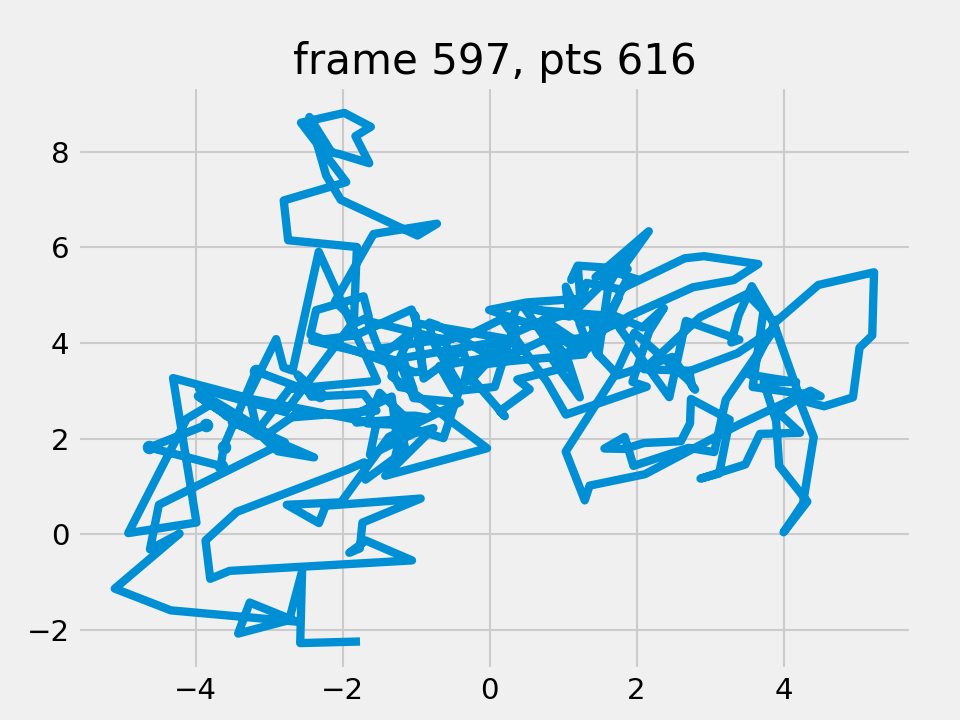

In [69]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca()
def animate(i):
    i1 = min(len(xs), len(ys))
    #i1 = min(i1, i)
    i0 = max(0, i1-300)
    i00 = max(0, i1-6)
    ax.clear()
    ax.plot(xs[i0:i1], ys[i0:i1])
    ax.scatter(xs[i00:i1], ys[i00:i1])
    #ax.set_xlim(-10,10)
    #ax.set_ylim(-10,10)
    plt.title("frame %d, pts %d" % (i, i1))
ani = animation.FuncAnimation(fig, animate, interval=200)
plt.show()


In [70]:
xs = None  # ends the thread

Exception in thread Thread-49:
Traceback (most recent call last):
  File "/home/julian/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/julian/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-68-e3a2ea021212>", line 15, in sockreadlines
    xs.append(p[0])
AttributeError: 'NoneType' object has no attribute 'append'



In [ ]:
# Next need buttons to pause, clear the data
#pause
ani.event_source.stop()
#unpause
ani.event_source.start()
# then to overlay onto a bitmap
# then to read a pixel intensity and send back to ESP32 rover
# with the intensity of flashing




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


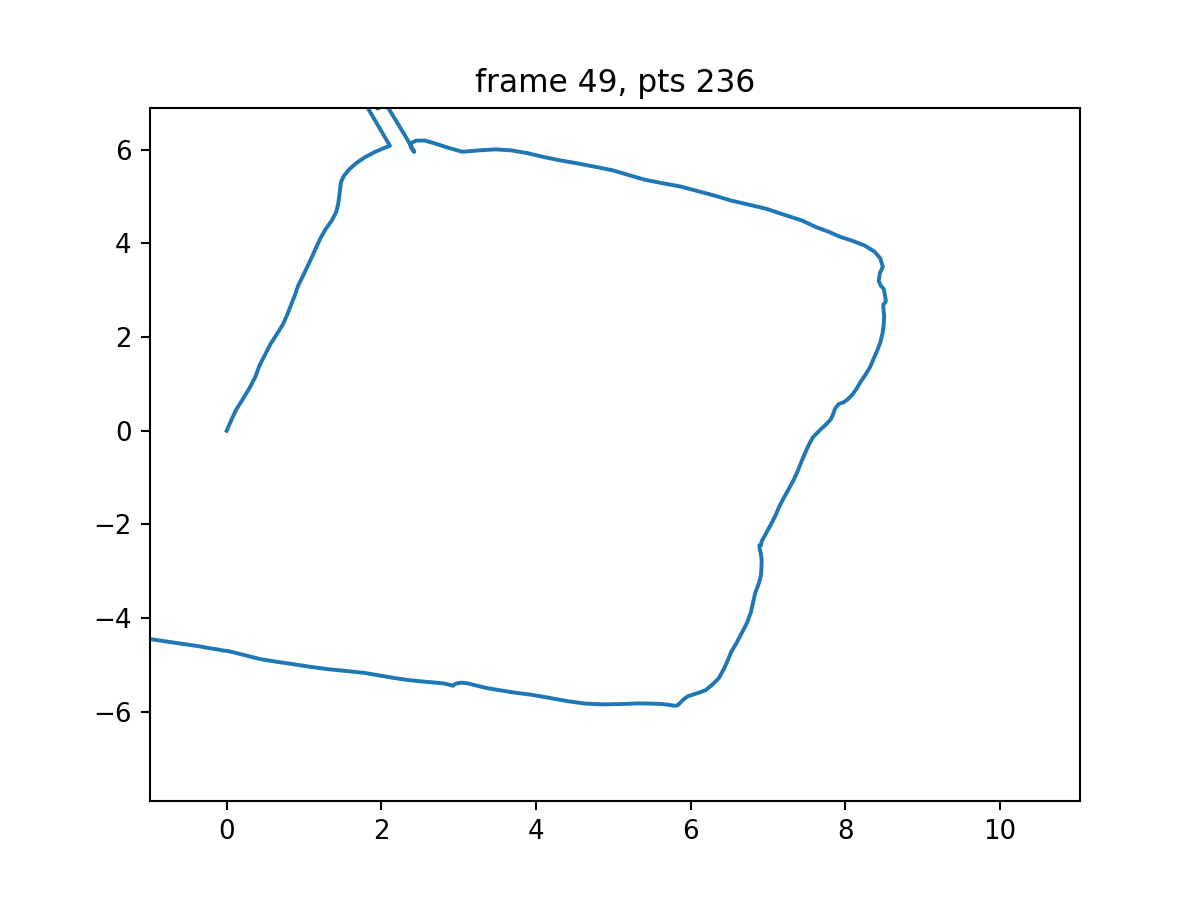

In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

plt.ion()
fig = plt.figure()
ax = fig.gca() # add_subplot(111)

fig.show()
fig.canvas.draw()
for i in range(0,50):
    ax.clear()
    i1 = min(len(xs), len(ys))
    i0 = max(0, i1-600)
    ax.plot(xs[i0:i1], ys[i0:i1])
    i00 = max(0, i1-6)
    ax.scatter(xs[i00:i1], ys[i00:i1])
    plt.title("frame %d, pts %d" % (i, i1))
    fig.canvas.draw()
    ax.autoscale_view();
    plt.pause(0.5)    #sleep


In [72]:
help(animation.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  Makes an animation by repeatedly calling a function ``func``.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in ``frames``.   Any additional positional
 |     arguments can be supplied via the ``fargs`` parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists:
 |  
 |  frames : iterable, int, generator function, or None, optional
 |      Source of data to pass ``func`` and each frame of the animation
 |  
 |      If an iterable, then simply use the values provided.  If the
 |      iterable has a length, it will override the ``save_count`` kwarg.
 |  
 |      If an integer, then equivalent to passing 

In [1]:
from ubxutils import convbinfile, calcpossingle, loadposfile, calcavgposition, updatexytime, calcposrtk
fubxA = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.ubx"
fubxB = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.ubx"
fubxC = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.ubx"


In [14]:
import socket
ss = socket.socket()
ipnumber = "127.0.0.1"
portnumber = 9052
ss.bind((ipnumber, portnumber))
ss.listen(0)

In [15]:
print("Waiting for a connection on ({}, {})".format(ipnumber, portnumber))
s, addr = ss.accept()
print("Got", s, addr)
header = s.recv(4)

Waiting for a connection on (127.0.0.1, 9052)
Got <socket.socket fd=48, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9052), raddr=('127.0.0.1', 53120)> ('127.0.0.1', 53120)


In [19]:
s.recv(10)

b'dingo\r\n'

In [13]:
s.accept()

(<socket.socket fd=43, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9051), raddr=('127.0.0.1', 44308)>,
 ('127.0.0.1', 44308))

In [10]:
help(s.accept)

Help on method accept in module socket:

accept() method of socket.socket instance
    accept() -> (socket object, address info)
    
    Wait for an incoming connection.  Return a new socket
    representing the connection, and the address of the client.
    For IP sockets, the address info is a pair (hostaddr, port).



In [ ]:
import socket, time
ss = socket.socket()
androidipnumber = "192.168.43.1"
portnumber = 9042

# This is all that's required to connect - when the ESP is hanging on s.accept()
ss.connect(socket.getaddrinfo(androidipnumber, portnumber)[0][-1])
s = ss.makefile('rwb', 0)  # convert socket into an io stream

print(s.readline())
s.write(b"-AAA")

In [32]:
ipnumber = "127.0.0.1"
portnumber = 9054
ss = socket.socket()
ss.connect(socket.getaddrinfo(ipnumber, portnumber)[0][-1])
s = ss.makefile('rwb', 0)  # convert socket into an io stream
print(s)

In [42]:
print(s.readline())

b'2019/03/06 13:33:36.400   54.592088703   -5.927508274    70.7429   2  15   0.1199   0.0880   0.2179  -0.0465  -0.0513   0.0895   2.21    1.0\n'
